# Pós Graduação em Ciência de Dados e Big Data PUC Minas Uberlândia
## ILE - Introdução às Linguagens Estatísticas
**Aluno**: Herculano Cunha



In [99]:
import pandas as pd
import calendar as cal
from datetime import datetime
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py  # tools to communicate with Plotly's server
from math import sqrt

In [100]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

def calc_numero_classes(x):
    if sqrt(valor_maximo) > 20: 
        return 20 
    else: 
        return int(round(sqrt(valor_maximo)))

In [101]:
# Bases de utilização, dados de distribuidora de bebidas
pessoa_df = pd.read_csv('./dados/tab_pessoa.csv',encoding='utf-8',sep=';')
unidade_df = pd.read_csv('./dados/tab_unidade.csv',encoding='utf-8',sep=';')
cidade_df = pd.read_csv('./dados/tab_cidade.csv',encoding='utf-8',sep=';')
item_df = pd.read_csv('./dados/tab_item.csv',encoding='utf-8',sep=';')
pre_venda_df = pd.read_csv('./dados/tab_pre_venda.csv',encoding='utf-8',sep=';')
item_pre_venda_df = pd.read_csv('./dados/tab_item_pre_venda.csv',encoding='utf-8',sep=';')
grupo_item_df = pd.read_csv('./dados/tab_grupo_item.csv',encoding='utf-8',sep=';')

Terminado


In [103]:
#Adicionando uma formatação para a data de emissão para fazer agrupamento
pre_venda_df['mes_num'] =  pre_venda_df.apply(lambda row: datetime.strptime(row['dta_emissao'],'%d/%m/%Y 00:00').strftime('%m'), axis=1)
#Convertendo os valores em decimal com ponto
pre_venda_df['val_total_pre_venda'] =  pre_venda_df.apply(lambda row: float(str(row['val_total_pre_venda']).replace(',','.')), axis=1)

In [104]:
pre_venda_df = pre_venda_df.join(pessoa_df.set_index('cod_pessoa'), on='cod_pessoa_cliente')


In [105]:
pre_venda_df

,seq_pre_venda,dta_emissao,hra_emissao,cod_pessoa_cliente,cod_pessoa_representante,val_total_pre_venda,ind_status,mes_num,nom_pessoa,ind_natureza,cod_cidade,nom_bairro,ind_cliente,ind_representante
0,38.356,14/03/2017 00:00,09:10,969.000,1.568,152.10,CC,03,CLIENTE_969,J,5.002,CHACARAS TUBALINA,S,N
1,38.418,14/03/2017 00:00,15:42,2.959,19.000,228.84,CC,03,CLIENTE_2959,J,5.220,CHAPADA DAS PERDIZES,S,N
2,39.812,03/04/2017 00:00,16:32,3.043,19.000,4278.19,CC,04,CLIENTE_3043,F,2.391,SANTO ANTONIO,S,N
3,44.090,31/05/2017 00:00,08:02,1.198,22.000,15537.00,CC,05,CLIENTE_1198,J,1.227,LOTEAMENTO IPANEMA,S,N
4,38.420,14/03/2017 00:00,15:48,2.961,19.000,731.49,CC,03,CLIENTE_2961,J,5.220,CENTRO,S,N
5,38.804,17/03/2017 00:00,16:54,1.542,93.000,139.84,CC,03,CLIENTE_1542,F,5.002,LUIZOTE DE FREITAS,S,N
6,45.741,14/06/2017 00:00,15:55,301.000,2.182,2524.99,FA,06,CLIENTE_301,F,5.002,SANTO INACIO,S,N
7,45.744,13/06/2017 00:00,16:08,1.000,685.000,46.18,FA,06,CLIENTE_1,F,4.555,NENHUM,S,N
7,45.744,13/06/2017 00:00,16:08,1.000,685.000,46.18,FA,06,CLIENTE_1000,F,3.028,VILA DOURADA,S,N
8,33.525,09/01/2017 00:00,15:39,2.222,18.000,257.34,FA,01,CLIENTE_2222,J,5.002,TOCANTINS,S,N


In [106]:
#Agrupamneto e soma das vendas por mes
soma_mensal_df = pre_venda_df.groupby(['mes_num'])[['val_total_pre_venda']].sum()
soma_mensal_df= soma_mensal_df.add_suffix('_soma').reset_index()
soma_mensal_df['val_total_pre_venda_soma'] = soma_mensal_df.apply(lambda row: row['val_total_pre_venda_soma'] / 1000000, axis=1)

#Agrupamneto e soma das vendas por cliente
soma_cliente_df = pre_venda_df.groupby(['nom_pessoa'])[['val_total_pre_venda']].sum()
contagem_pedidos_cliente_df = pre_venda_df.groupby(['nom_pessoa'])[['seq_pre_venda']].count()
soma_cliente_df = soma_cliente_df.add_suffix('_soma').reset_index()
contagem_pedidos_cliente_df = contagem_pedidos_cliente_df.add_suffix('_contagem').reset_index()

In [107]:
# A intenção da tabela e mostrar o faturamento de vendas por mes (numero)
soma_mensal_df

,mes_num,val_total_pre_venda_soma
0,01,3.125838
1,02,4.858180
2,03,4.558681
3,04,6.370105
4,05,9.977826
5,06,10.202588
6,07,7.792993
7,08,6.408253


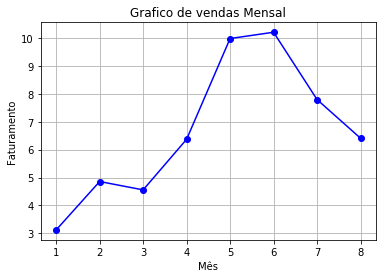

In [108]:
# A intenção deste grafico e mostrar o faturamento de vendas por mes (numero)
plt.plot(soma_mensal_df['mes_num'],soma_mensal_df['val_total_pre_venda_soma'], color='blue', marker='o', linestyle='solid')
plt.title("Grafico de vendas Mensal")
plt.ylabel("Faturamento")
plt.xlabel("Mês")
plt.grid(True)
plt.show()

In [109]:
# Calculando os valor para gerar a amplitude, em seguida criar a tabela de frequencia
valor_minimo = contagem_pedidos_cliente_df['seq_pre_venda_contagem'].min()
valor_maximo = contagem_pedidos_cliente_df['seq_pre_venda_contagem'].max()


numero_classes = calc_numero_classes(valor_maximo)
amplitude = int(round((valor_maximo - valor_minimo) / numero_classes))

In [110]:
# Tabela de frequencia, obrigado prof. Arthur 
tabela_frequencia = pd.cut(contagem_pedidos_cliente_df['seq_pre_venda_contagem'], bins=numero_classes).value_counts(sort=False)
tabela_frequencia

(-1.399, 120.95]     1850
(120.95, 240.9]         0
(240.9, 360.85]         0
(360.85, 480.8]         0
(480.8, 600.75]         0
(600.75, 720.7]         0
(720.7, 840.65]         0
(840.65, 960.6]         0
(960.6, 1080.55]        0
(1080.55, 1200.5]       0
(1200.5, 1320.45]       0
(1320.45, 1440.4]       0
(1440.4, 1560.35]       0
(1560.35, 1680.3]       0
(1680.3, 1800.25]       0
(1800.25, 1920.2]       0
(1920.2, 2040.15]       0
(2040.15, 2160.1]       0
(2160.1, 2280.05]       0
(2280.05, 2400]         2
Name: seq_pre_venda_contagem, dtype: int64

In [111]:
# Exemplo para gerar tabela de frequencia manualmente

min = valor_minimo
max = valor_minimo + amplitude
num = numero_classes

lista_classes = []
lista_min = []
lista_max = []




while num > 0:
    if num == numero_classes:
        classe = "({0},{1}]".format(min, max)
        lista_classes.append(classe)
        lista_min.append(min)
        lista_max.append(max)
    else:
        max = min + amplitude
        classe = "({0},{1}]".format(min, max)
        lista_classes.append(classe)
        lista_min.append(min)
        lista_max.append(max)
    min= max    
    num = num - 1

d= {
    'classe': lista_classes,
    'min': lista_min,
    'max': lista_max
}

dft = pd.DataFrame(d)
dft

,classe,max,min
0,"(1,121]",121,1
1,"(121,241]",241,121
2,"(241,361]",361,241
3,"(361,481]",481,361
4,"(481,601]",601,481
5,"(601,721]",721,601
6,"(721,841]",841,721
7,"(841,961]",961,841
8,"(961,1081]",1081,961
9,"(1081,1201]",1201,1081


In [112]:
# Já é possivel identificar os outliers, para uma melhor analise é necessário remove-los 
# Explicando os outliers, eles são clientes criados para teste de sistema, por isso tantos pedidos

# Original é contagem_pedidos_cliente_df

contagem_pedidos_cliente_df = contagem_pedidos_cliente_df[(contagem_pedidos_cliente_df.seq_pre_venda_contagem  < 2280.05)]

# Recalculando os valores para frequencia 
valor_minimo = contagem_pedidos_cliente_df['seq_pre_venda_contagem'].min()
valor_maximo = contagem_pedidos_cliente_df['seq_pre_venda_contagem'].max()

numero_classes = calc_numero_classes(valor_maximo)
amplitude = int(round((valor_maximo - valor_minimo) / numero_classes))

#tabela_frequencia= pd.cut(contagem_pedidos_cliente_df['seq_pre_venda_contagem'], bins=numero_classes).value_counts(sort=False)
tabela_frequencia= contagem_pedidos_cliente_df['seq_pre_venda_contagem'].value_counts(bins=numero_classes,sort=False)


tabela_frequencia

0.918000     1292
10.111111     253
19.222222     146
28.333333      83
37.444444      38
46.555556      23
55.666667       7
64.777778       5
73.888889       3
Name: seq_pre_venda_contagem, dtype: int64

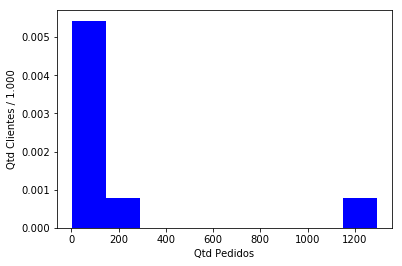

In [126]:
#Tentativa de desenhar um histograma que representa a tabela de frequencia
# Arthur estranho porem retrata que a classe que realiza mais pedidos é a de 0.918000 à 10.111111
x = tabela_frequencia
plt.hist(x, normed=True, bins=numero_classes)
rects1= plt.hist(x, normed=True, bins=numero_classes, facecolor='blue')

plt.ylabel('Qtd Clientes / 1.000')
plt.xlabel('Qtd Pedidos')
plt.show()

In [114]:
# Calcular a média, mediana e moda das vendas por cliente, neste momente achei mais interessante calcular com o valor
# das vendas não com a contagem de pedidos, levando em consideração todo o periodo que no caso é apartir de jan/2017

#Join entre os data frames agregados, agora tenho a quantidade de pedidos e total faturado por cada cliente, retirado os outliers
pedidos_faturamento_cliente_df = contagem_pedidos_cliente_df.join(soma_cliente_df.set_index('nom_pessoa'), on='nom_pessoa')

media_faturamento =  pedidos_faturamento_cliente_df['val_total_pre_venda_soma'].mean()
mediana_faturamento = pedidos_faturamento_cliente_df['val_total_pre_venda_soma'].median()
moda_faturamento = pedidos_faturamento_cliente_df['val_total_pre_venda_soma'].mode()

#pedidos_faturamento_cliente_df.describe()

print('Média de faturamento entre clientes nos meses de 2017 : ', media_faturamento, ' A mediana é : ', mediana_faturamento, ' A moda é : ', moda_faturamento)

Média de faturamento entre clientes nos meses de 2017 :  24297.59258918918  A mediana é :  2479.48  A moda é :  0    32.0
dtype: float64


In [115]:
#Gerando dados de faturamento por cidade para montar grafico
pe= {
    'cod_pessoa': pessoa_df['cod_pessoa'],
    'nom_pessoa': pessoa_df['nom_pessoa'],
    'cod_cidade': pessoa_df['cod_cidade']
}

pe = pd.DataFrame(pe)

pedidos_faturamento_cliente_df = pedidos_faturamento_cliente_df.join(pe.set_index('nom_pessoa'), on='nom_pessoa')
pedidos_faturamento_cliente_df = pedidos_faturamento_cliente_df.join(cidade_df.set_index('cod_cidade'), on='cod_cidade')

#pedidos_faturamento_cliente_df['pecent_vendas'] = pedidos_faturamento_cliente_df.apply(lambda row: row['val_total_pre_venda_soma'] / val_total_vendas, axis=1)
soma_cidade_df = pedidos_faturamento_cliente_df.groupby(['nom_cidade'])[['val_total_pre_venda_soma']].sum()
soma_cidade_df = soma_cidade_df.reset_index()

soma_cidade_top10_df = soma_cidade_df.nlargest(10,'val_total_pre_venda_soma')

soma_cidade_top10_df


,nom_cidade,val_total_pre_venda_soma
59,UBERLANDIA,14961805.67
58,UBERABA,5921245.90
22,DIVINOPOLIS,3639910.97
20,CONTAGEM,3435105.14
47,RIBEIRAO DAS NEVES,1842953.43
7,BELO HORIZONTE,1576855.86
39,MONTE CARMELO,1246380.75
6,ARCOS,1012291.30
16,CATALAO,1006026.94
32,ITUIUTABA,930045.96


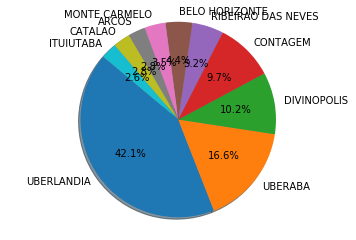

In [116]:
# Grafico que representa em percentual o faturamento total entre os top 10
labels = soma_cidade_top10_df['nom_cidade']
sizes = soma_cidade_top10_df['val_total_pre_venda_soma']

 
# Plot
plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [117]:
item_pre_venda_df = item_pre_venda_df.join(grupo_item_df.set_index('cod_item'), on='cod_item')
contagem_venda_grupo = item_pre_venda_df.groupby(['des_grupo_item'])[['seq_pre_venda']].count()
contagem_venda_grupo = contagem_venda_grupo.reset_index()
contagem_venda_grupo['std'] = contagem_venda_grupo.apply(lambda row: row['seq_pre_venda'] / row['seq_pre_venda'], axis=1)
contagem_venda_grupo

,des_grupo_item,seq_pre_venda,std
0,AGUAS,774,1.0
1,ATIVO IMOBILIZADO,474,1.0
2,CERVEJAS,35124,1.0
3,DESTILADOS,10626,1.0
4,ENERGETICOS,3045,1.0
5,GELO,53,1.0
6,ISOTONICO,351,1.0
7,REFRIGERANTES,16060,1.0
8,SUCOS,1806,1.0
9,USO E CONSUMO,76,1.0


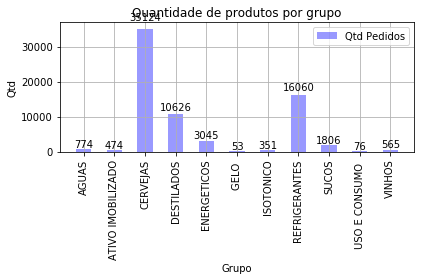

In [118]:
# 
y =  contagem_venda_grupo['seq_pre_venda']
v = contagem_venda_grupo['std']
x = contagem_venda_grupo['des_grupo_item']

n = range(len(contagem_venda_grupo['des_grupo_item']))


fig, ax = plt.subplots()

index = n
bar_width = 0.50

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, y, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=v,
                 error_kw=error_config,
                 label='Qtd Pedidos')

autolabel(rects1)

plt.xlabel('Grupo')
plt.ylabel('Qtd')
plt.title('Quantidade de produtos por grupo')
plt.xticks(index , x, rotation='vertical')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [119]:
#Ideia é gerar o desvio padrão e a varianca da quantidade de vendas por produto então vou começar a trabalhar nos dados 
item_pre_venda_df = item_pre_venda_df.join(item_df.set_index('cod_item'), on='cod_item')
contagem_vendas_produto = item_pre_venda_df.groupby(['des_item'])[['seq_pre_venda']].count()
contagem_vendas_produto= contagem_vendas_produto.reset_index()
contagem_vendas_produto = contagem_vendas_produto.sort_values(['seq_pre_venda'], ascending=False)
contagem_vendas_produto

,des_item,seq_pre_venda
39,BRAHMA 300ML,4228
50,BRAHMA LATA 350ML,4215
101,COCA COLA 2L 6X1,3205
302,SKOL LATA 350ML,2868
116,CRYSTAL LATA 350ML,2762
43,BRAHMA 600ML MG,2052
115,CRYSTAL 600ML,1739
95,COCA COLA 1L RETORNAVEL,1643
49,BRAHMA LATA 350 TM,1635
56,BRAHMA1L,1495


In [120]:
media  = contagem_vendas_produto['seq_pre_venda'].mean()
min_vendas =  contagem_vendas_produto['seq_pre_venda'].min()
max_vendas =  contagem_vendas_produto['seq_pre_venda'].max()
n = contagem_vendas_produto['des_item'].count() - 1


contagem_vendas_produto['vend_media'] = contagem_vendas_produto.apply(lambda row: (row['seq_pre_venda'] - media), axis=1)
contagem_vendas_produto['vend_media_exp'] = contagem_vendas_produto.apply(lambda row: (row['vend_media'] ** 2), axis=1)
soma_var = contagem_vendas_produto['vend_media_exp'].sum()
varianca = soma_var / n
desvio_padrao = sqrt(varianca)

print('Média : ',media,' Variança : ',varianca,' Desvio padrão : ', desvio_padrao, ' Min Vendas : ',min_vendas,' Max Vendas: ', max_vendas)
#contagem_vendas_produto['seq_pre_venda'].std()

Média :  197.01142857142858  Variança :  245314.148866  Desvio padrão :  495.2919834462783  Min Vendas :  1  Max Vendas:  4228


In [121]:
contagem_vendas_produto['score_z'] = contagem_vendas_produto.apply(lambda row: (row['seq_pre_venda'] - media) / desvio_padrao, axis=1)
contagem_vendas_produto
#Certeza que brahma tamanho 300 e 350 são as que mais vendem, outliers

,des_item,seq_pre_venda,vend_media,vend_media_exp,score_z
39,BRAHMA 300ML,4228,4030.988571,1.624887e+07,8.138611
50,BRAHMA LATA 350ML,4215,4017.988571,1.614423e+07,8.112363
101,COCA COLA 2L 6X1,3205,3007.988571,9.047995e+06,6.073162
302,SKOL LATA 350ML,2868,2670.988571,7.134180e+06,5.392756
116,CRYSTAL LATA 350ML,2762,2564.988571,6.579166e+06,5.178740
43,BRAHMA 600ML MG,2052,1854.988571,3.440983e+06,3.745242
115,CRYSTAL 600ML,1739,1541.988571,2.377729e+06,3.113292
95,COCA COLA 1L RETORNAVEL,1643,1445.988571,2.090883e+06,2.919467
49,BRAHMA LATA 350 TM,1635,1437.988571,2.067811e+06,2.903315
56,BRAHMA1L,1495,1297.988571,1.684774e+06,2.620653


In [127]:
contagem_pedidos_cliente_df

,nom_pessoa,seq_pre_venda_contagem
1,CLIENTE_100,1
3,CLIENTE_1004,4
4,CLIENTE_1005,2
5,CLIENTE_1010,6
6,CLIENTE_1011,26
7,CLIENTE_1012,2
8,CLIENTE_1016,7
9,CLIENTE_1017,20
10,CLIENTE_1018,27
11,CLIENTE_1019,32
